In [1]:
import librosa
def manipulate_speed(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)
import numpy as np


In [2]:
import IPython.display as ipd

In [3]:
#orginal audio
data, sr = librosa.load('audio.wav')
ipd.Audio(data,rate = sr)

In [4]:
import librosa.display

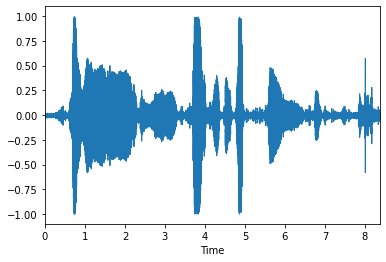

In [5]:
librosa.display.waveplot(data,sr)

In [6]:
#speeding up the audio
speed_data = manipulate_speed(data,1.5)
ipd.Audio(speed_data, rate=sr)

Populating the interactive namespace from numpy and matplotlib


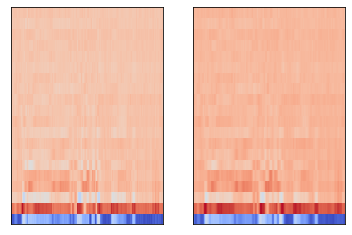

In [7]:
%pylab inline
#fast data
subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(data, sr)
librosa.display.specshow(mfcc1)

subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(speed_data, sr)
librosa.display.specshow(mfcc2)

In [8]:
mfcc1.shape,mfcc2.shape

((20, 361), (20, 241))

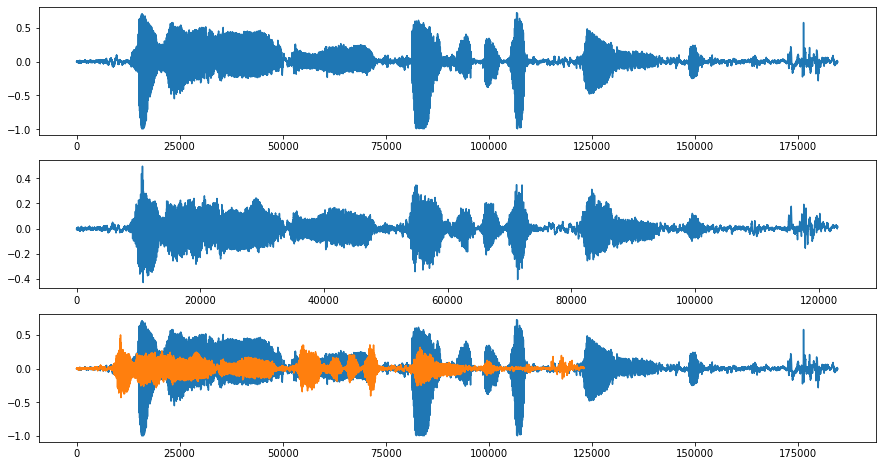

In [9]:
plt.figure(figsize=(15,8))

plt.subplot(3,1,1)
plt.plot(data)

plt.subplot(3,1,2)
plt.plot(speed_data)

plt.subplot(3,1,3)
plt.plot(data)
plt.plot(speed_data)

In [10]:
print(mfcc1.shape,mfcc2.shape)

(20, 361) (20, 241)


In [11]:
361/43,241/43

(8.395348837209303, 5.604651162790698)

(-0.5, 240.5)

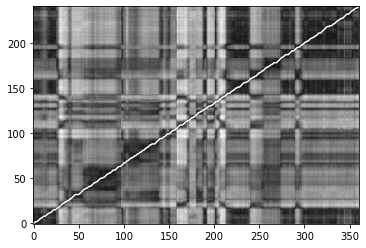

In [12]:
from numpy.linalg import norm
from dtw import dtw

dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
imshow(cost.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, cost.shape[0]-0.5))
ylim((-0.5, cost.shape[1]-0.5))

In [13]:
prolonged = data[20286:51156]
fast = np.array(manipulate_speed(prolonged,3))
ipd.Audio(fast, rate=sr)

#perfect sentence formation
d = list(data)
perfect = d[0:20286]+list(fast)+d[51156:] #word name is fast
ipd.Audio(perfect, rate=sr)

Populating the interactive namespace from numpy and matplotlib


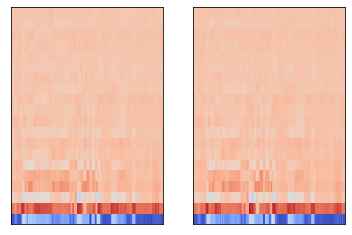

In [14]:
%pylab inline

subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(data, sr)
librosa.display.specshow(mfcc1)

subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(np.array(perfect), sr)
librosa.display.specshow(mfcc2)

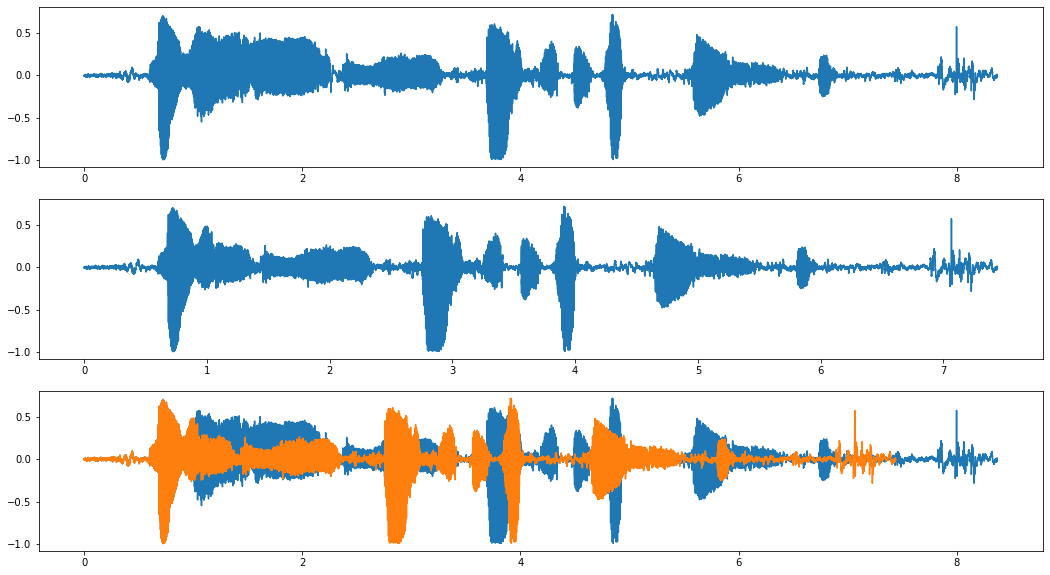

In [15]:
# %matplotlib inline
# import seaborn as sns
# sns.set_context('notebook')
# %config InlineBackend.figure_format = 'retina'


plt.figure(figsize=(18,10))

plt.subplot(3,1,1)
t1 = np.linspace(0,librosa.get_duration(data),len(data))
plt.plot(t1,data,label = 'original')

plt.subplot(3,1,2)
t2 = np.linspace(0,librosa.get_duration(perfect),len(perfect))
plt.plot(t2,perfect,label = 'perfect')

plt.subplot(3,1,3)
plt.plot(t1,data)
plt.plot(t2,perfect)
plt.show();

In [16]:
str(50/43),str(60/43),50/43,100/43

('1.1627906976744187',
 '1.3953488372093024',
 1.1627906976744187,
 2.3255813953488373)

(-0.5, 320.5)

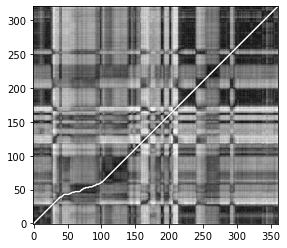

In [17]:
from numpy.linalg import norm
from dtw import dtw

dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))

imshow(cost.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, cost.shape[0]-0.5))
ylim((-0.5, cost.shape[1]-0.5))

Populating the interactive namespace from numpy and matplotlib


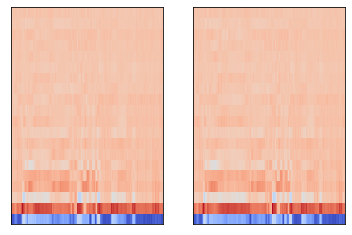

In [18]:
prolonged = data[20286:51156]
slow = np.array(manipulate_speed(prolonged,0.5))
ipd.Audio(fast, rate=sr)

#perfect sentence formation
d = list(data)
perfect = d[0:20286]+list(slow)+d[51156:]
ipd.Audio(perfect, rate=sr)

%pylab inline

subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(data, sr)
librosa.display.specshow(mfcc1)

subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(np.array(perfect), sr)
librosa.display.specshow(mfcc2)

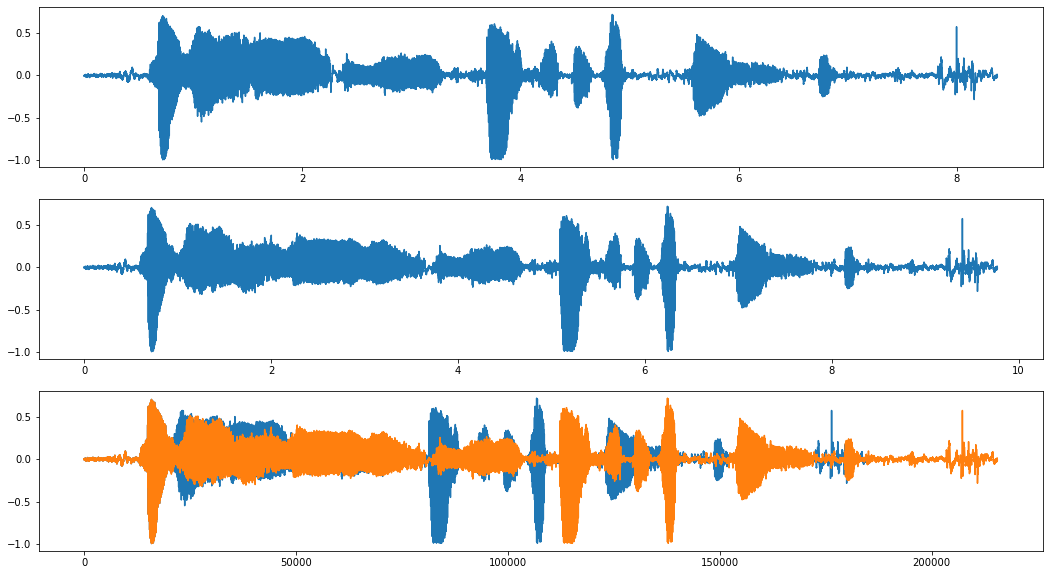

In [19]:
# %matplotlib inline
# import seaborn as sns
# sns.set_context('notebook')
# %config InlineBackend.figure_format = 'retina'


plt.figure(figsize=(18,10))

plt.subplot(3,1,1)
t1 = np.linspace(0,librosa.get_duration(data),len(data))
plt.plot(t1,data,label = 'original')

plt.subplot(3,1,2)
t2 = np.linspace(0,librosa.get_duration(perfect),len(perfect))
plt.plot(t2,perfect,label = 'perfect')

plt.subplot(3,1,3)
plt.plot(data)
plt.plot(perfect)
plt.show();

(-0.5, 420.5)

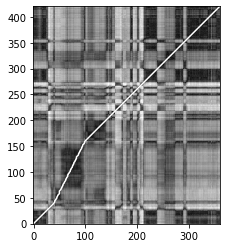

In [28]:
from numpy.linalg import norm
from dtw import dtw

dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))

imshow(cost.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, cost.shape[0]-0.5))
ylim((-0.5, cost.shape[1]-0.5))

In [46]:
mfcc1.shape,mfcc2.shape

((20, 361), (20, 421))